<a href="https://colab.research.google.com/github/Arinjay11000/Minor-Machine-Learning-Projects/blob/main/Stock%20Price/Stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [2]:
import os

In [3]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 4.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [4]:
key="7993cb7a9720eec8af4a1bdf0e5459453553dbdb"
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-05-01 00:00:00+00:00  146.58  147.20  144.96  145.10  32818760   
       2017-05-02 00:00:00+00:00  147.51  148.09  146.84  147.54  39752670   
       2017-05-03 00:00:00+00:00  147.06  147.49  144.27  145.59  45142806   
       2017-05-04 00:00:00+00:00  146.53  147.14  145.81  146.52  23275690   
       2017-05-05 00:00:00+00:00  148.96  148.98  146.76  146.76  26787359   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-05-01 00:00:00+00:00  34.593441  34.739763  34.211115  34.244155   
       2017-05-02 00:00:00+00:00  34.812924  34.949807  34.654802  34.820004   
       2017-05-03 00:00:00+00:00  34.706723  34.808204  34.048272  34.359797   
       2017-05-04 00:00:00+00:00  34.581641  34.725603  34.411718  34.579281   
       2017-05-05 00:00:00+00:00  35.155130  35.159850  34.635922  34.635922   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-05-01 00:00:00+00:00  131275040      0.0          1.0  
       2017-05-02 00:00:00+00:00  159010680      0.0          1.0  
       2017-05-03 00:00:00+00:00  180571224      0.0          1.0  
       2017-05-04 00:00:00+00:00   93102760      0.0          1.0  
       2017-05-05 00:00:00+00:00  107149436      0.0          1.0

In [6]:
df.to_csv("AAPL.csv")

In [7]:
pd.set_option("display.max_columns",500)

In [8]:
df=pd.read_csv("/content/AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-05-01 00:00:00+00:00,146.58,147.20,144.96,145.10,32818760,34.593441,34.739763,34.211115,34.244155,131275040,0.0,1.0
1,AAPL,2017-05-02 00:00:00+00:00,147.51,148.09,146.84,147.54,39752670,34.812924,34.949807,34.654802,34.820004,159010680,0.0,1.0
2,AAPL,2017-05-03 00:00:00+00:00,147.06,147.49,144.27,145.59,45142806,34.706723,34.808204,34.048272,34.359797,180571224,0.0,1.0
3,AAPL,2017-05-04 00:00:00+00:00,146.53,147.14,145.81,146.52,23275690,34.581641,34.725603,34.411718,34.579281,93102760,0.0,1.0
4,AAPL,2017-05-05 00:00:00+00:00,148.96,148.98,146.76,146.76,26787359,35.155130,35.159850,34.635922,34.635922,107149436,0.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1260 non-null   object 
 1   date         1260 non-null   object 
 2   close        1260 non-null   float64
 3   high         1260 non-null   float64
 4   low          1260 non-null   float64
 5   open         1260 non-null   float64
 6   volume       1260 non-null   int64  
 7   adjClose     1260 non-null   float64
 8   adjHigh      1260 non-null   float64
 9   adjLow       1260 non-null   float64
 10  adjOpen      1260 non-null   float64
 11  adjVolume    1260 non-null   int64  
 12  divCash      1260 non-null   float64
 13  splitFactor  1260 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.9+ KB


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,AAPL,2022-04-25 00:00:00+00:00,162.88,163.170,158.46,161.12,96046376,162.88,163.170,158.46,161.12,96046376,0.0,1.0
1256,AAPL,2022-04-26 00:00:00+00:00,156.80,162.340,156.72,162.25,94008394,156.80,162.340,156.72,162.25,94008394,0.0,1.0
1257,AAPL,2022-04-27 00:00:00+00:00,156.57,159.790,155.38,155.91,88063191,156.57,159.790,155.38,155.91,88063191,0.0,1.0
1258,AAPL,2022-04-28 00:00:00+00:00,163.64,164.515,158.93,159.25,130216792,163.64,164.515,158.93,159.25,130216792,0.0,1.0
1259,AAPL,2022-04-29 00:00:00+00:00,157.65,166.200,157.25,161.84,131747571,157.65,166.200,157.25,161.84,131747571,0.0,1.0


In [11]:
df1=df.reset_index()['close']
df1.head()

0    146.58
1    147.51
2    147.06
3    146.53
4    148.96
Name: close, dtype: float64

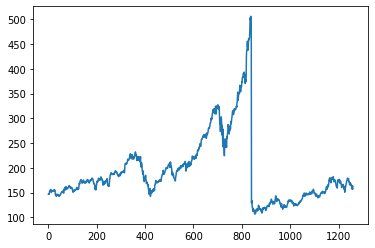

In [12]:
plt.plot(df1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.09953663]
 [0.101866  ]
 [0.10073889]
 ...
 [0.12455855]
 [0.14226675]
 [0.12726362]]


In [15]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1008, 252)

In [17]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(907, 100)
(907,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/Stock.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, ytest), callbacks=[checkpointer], verbose=1)

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 0.0258
Epoch 1: val_loss improved from inf to 0.00203, saving model to saved_models/Stock.hdf5
29/29 [==============================] - 21s 423ms/step - loss: 0.0258 - val_loss: 0.0020
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 0.0089
Epoch 2: val_loss improved from 0.00203 to 0.00063, saving model to saved_models/Stock.hdf5
29/29 [==============================] - 9s 303ms/step - loss: 0.0089 - val_loss: 6.3007e-04
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 0.0072
Epoch 3: val_loss did not improve from 0.00063
29/29 [==============================] - 5s 157ms/step - loss: 0.0072 - val_loss: 0.0011
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 0.0073
Epoch 4: val_loss improved from 0.00063 to 0.00033, saving model to saved_models/Stock.hdf5
29/29 [==============================] - 5s 156ms/step - loss: 0.0073 - val_loss: 3.3352e-04
Epoch 5/100


In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

216.31593204104692

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

164.81674859505762

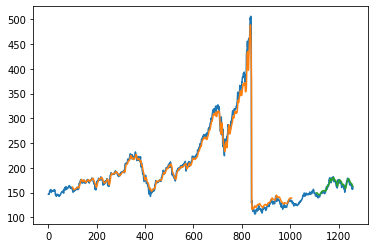

In [29]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

252

In [34]:
x_input=test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.1611521603005635,
 0.17092047589229803,
 0.16961803381340007,
 0.18186599874765175,
 0.17257357545397617,
 0.16904195366311836,
 0.1814902943018159,
 0.1638572323105823,
 0.16105197244834057,
 0.1575704445835942,
 0.1656856606136506,
 0.1723231058234188,
 0.17392611145898557,
 0.18407013149655604,
 0.18146524733876013,
 0.1816906700062617,
 0.1787351283656856,
 0.17715716969317463,
 0.18827802128991855,
 0.182492172824045,
 0.1705197244834063,
 0.16320601127113332,
 0.16363180964308072,
 0.1636819035691922,
 0.17092047589229803,
 0.17204758922980584,
 0.1636819035691922,
 0.1658860363180964,
 0.15769567939887286,
 0.1487539135879774,
 0.1444458359423919,
 0.13918597370068875,
 0.13720726361928615,
 0.1325986224170319,
 0.13237319974953032,
 0.13119599248591102,
 0.15902316844082653,
 0.17016906700062612,
 0.16974326862867878,
 0.17282404508453347,
 0.165460237946149,
 0.16418284283030676,
 0.16235441452723853,
 0.17029430181590482,
 0.17392611145898557,
 0.16350657482780212,
 0.1547

In [37]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13684094]
101
1 day input [0.17092048 0.16961803 0.181866   0.17257358 0.16904195 0.18149029
 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611
 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802
 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048
 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584
 0.13918597 0.13720726 0.13259862 0.1323732  0.13119599 0.15902317
 0.17016907 0.16974327 0.17282405 0.16546024 0.16418284 0.16235441
 0.1702943  0.17392611 0.16350657 0.15479023 0.15539136 0.16518472
 0.16458359 0.15539136 0.15143394 0.14396994 0.13332498 0.14001252
 0.14529743 0.1459737  0.14116468 0.14958046 0.14875391 0.14108954
 0.13139637 0.12673763 0.14053851 0.12944271 0.11994991 0.1096556
 0.1208516  0.13212273 0.13470257 0.14311835 0.14662492 0.15524108
 0.1587226  0.16839073 0.17001879 0.17222292 0.1806387  0.17765811
 0.16974327 0.16899186 0.17933626 0.17087038 0.16278021 0.16355667
 0.15842204 0.14755166 0.15233563 